In [1]:
import util.Simulation as Gsim
import util.RotRep as Rot
import numpy as np
import matplotlib.pyplot as plt
from util.config import Config
import os
from util.make_micFile import find_grains
from util.calibration_misc import data_prep,optimize_detector,write_config_file,write_peak_file
import yaml
import h5py
import time

## Make microstructure file


Number of features found using blob finder:  243
-0.556875 -0.360484


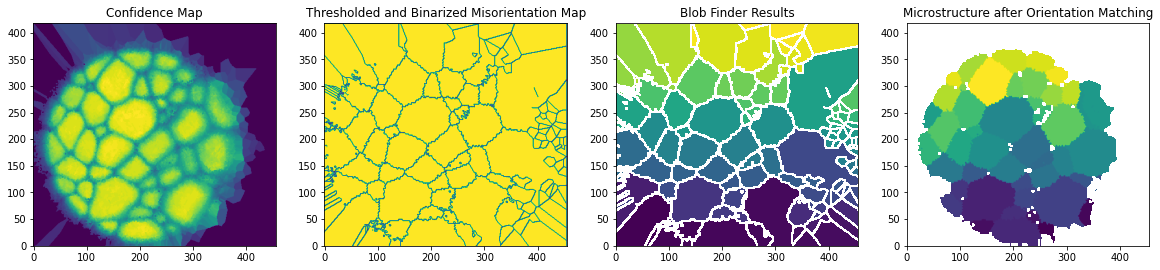

Number of Grains: 53


In [3]:
#######################################################################################
#set misorientation threshold (degrees) to binarize the image for blob finding
blobFindingConf = 1
#set confidence threshold for finding all voxels in a grain through orientation matching
oriMatchingConf = 0.4
#########################################################################################
Cfg = Config('Config_Files/Config_template.yml')
numGrains = find_grains(Cfg,blobFindingConf,oriMatchingConf)

# If you trust your detector parameters, stop here


## Choose small grain for optimization

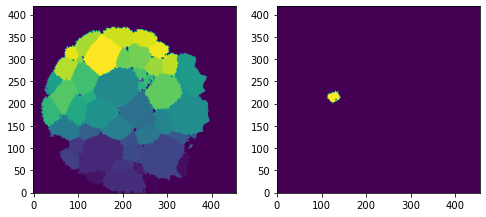

In [3]:
######################################################
grain_ID = 33
#######################################################
microstructure = np.array(h5py.File(Cfg.micFile,'r')['GrainID'])

calib_grain = np.where(microstructure==grain_ID,1,0)
mic = microstructure.copy()
mic[mic!=0]+=3
fig,ax = plt.subplots(ncols=2,figsize=(8,5))
ax[0].imshow(microstructure,origin='lower')
ax[1].imshow(calib_grain,origin='lower')
plt.show()

grain = Config(f'Config_Files/Grain_Files/Grain_%03d.yml'%grain_ID)

## Find the center of mass of each Bragg peak

25


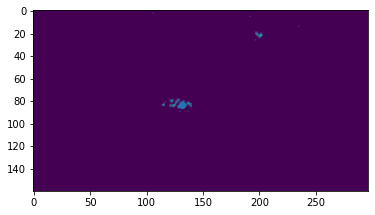

17


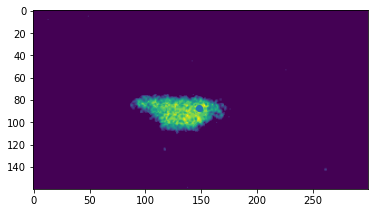

26


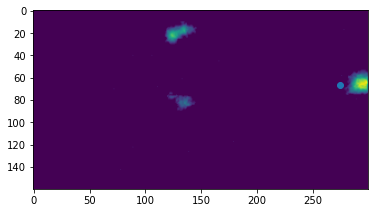

16


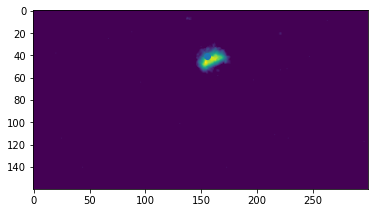

24


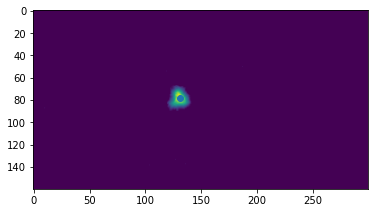

19


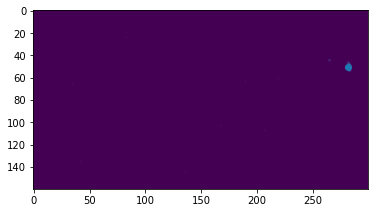

22


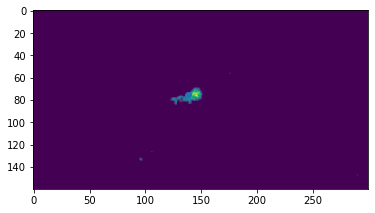

20


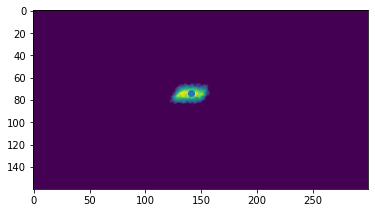

20


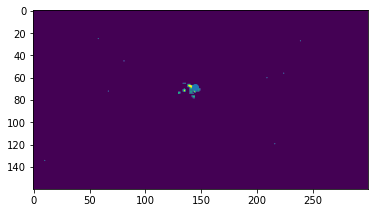

23


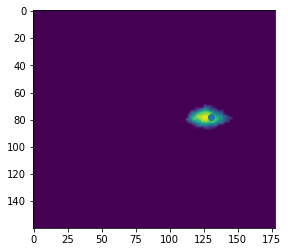

23


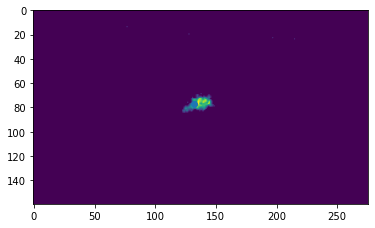

22


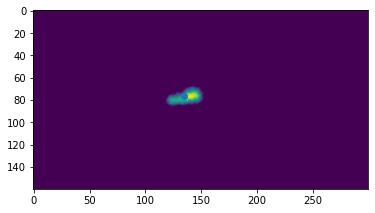

21


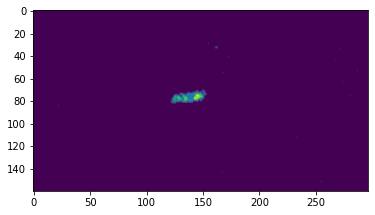

21


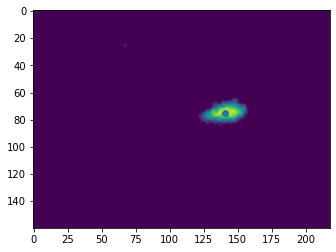

24


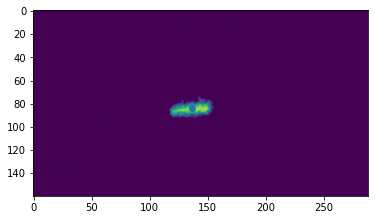

26


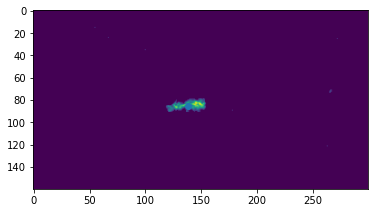

29


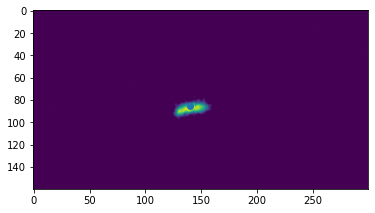

15


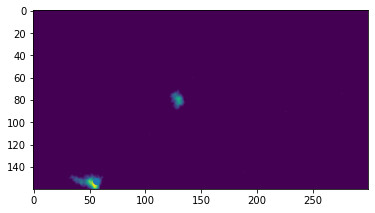

17


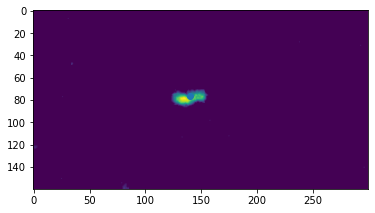

17


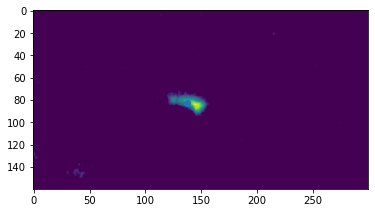

18


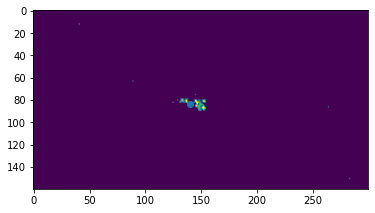

24


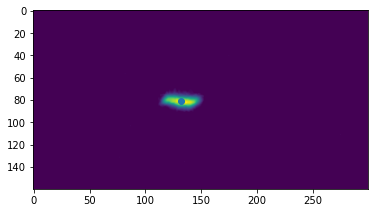

25


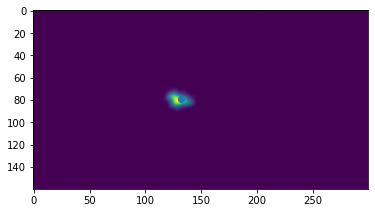

18


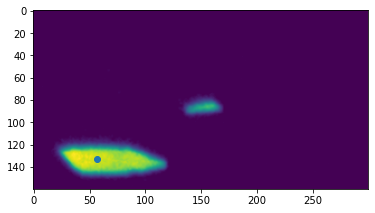

20


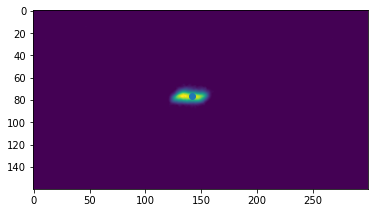

26


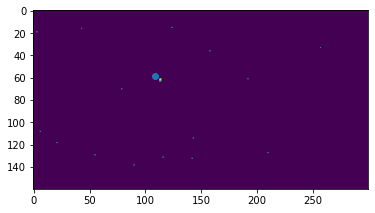

23


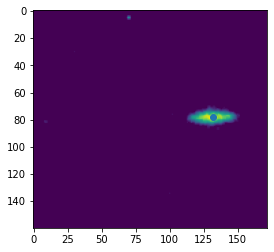

26


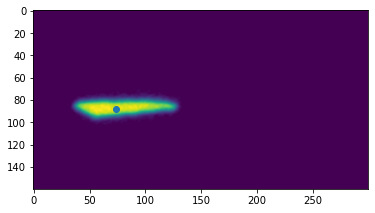

19


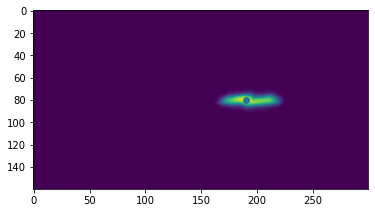

21


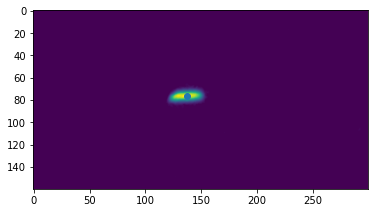

20


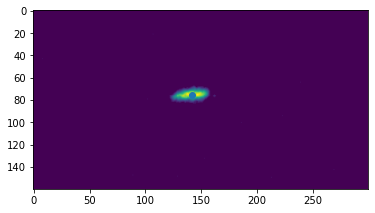

21


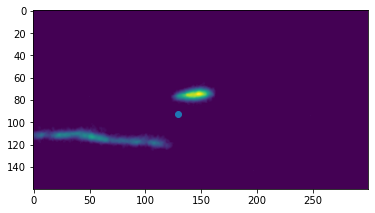

21


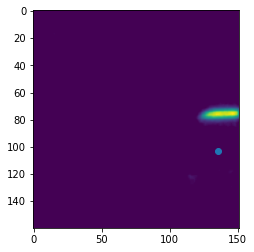

23


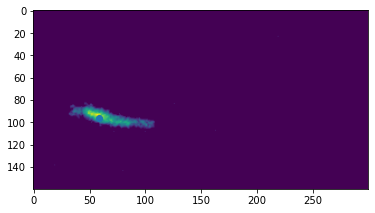

24


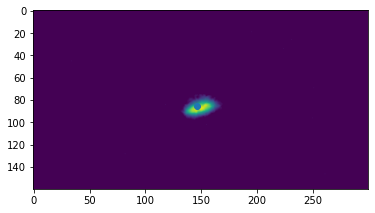

22


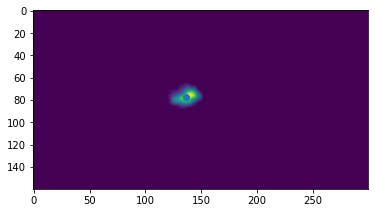

20


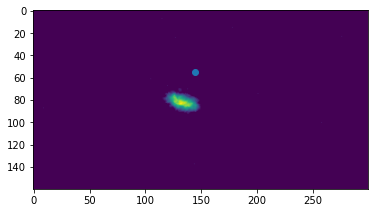

24


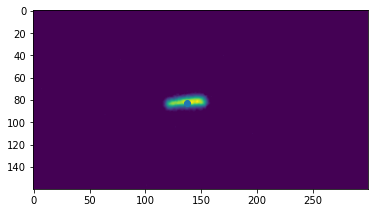

25


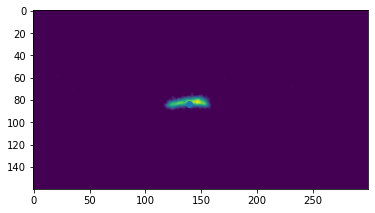

27


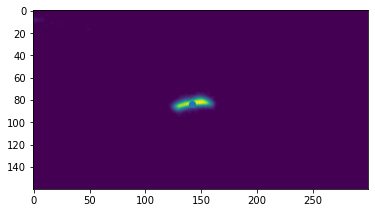

18


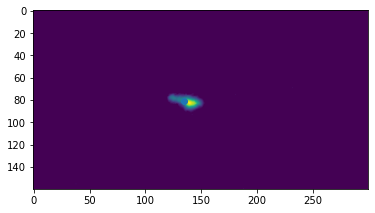

19


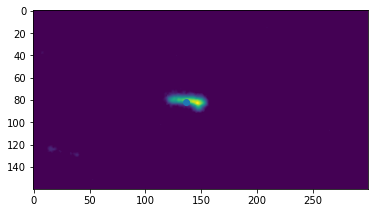

20


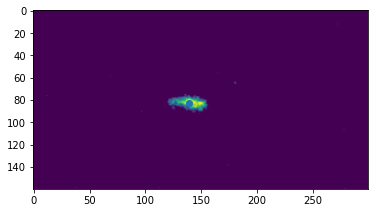

24


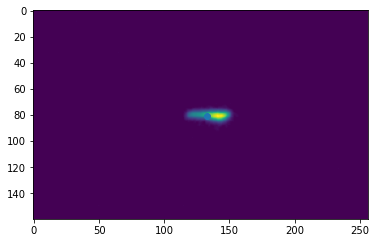

24


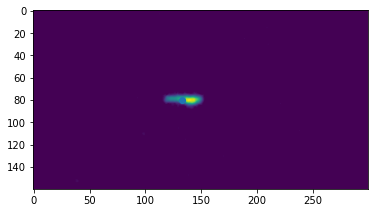

24


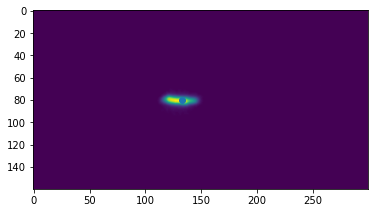

24


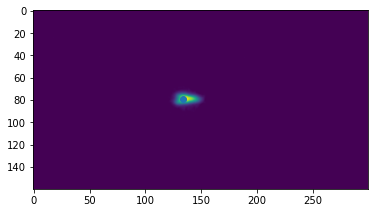

17


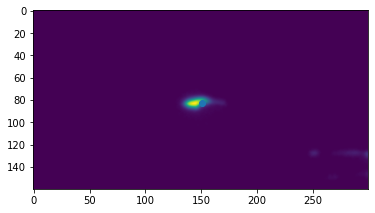

20


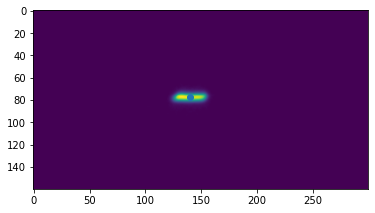

19


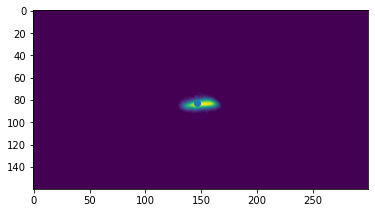

19


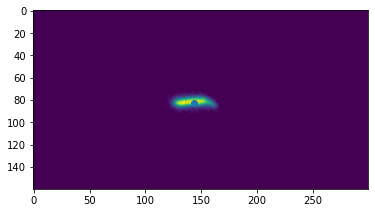

16


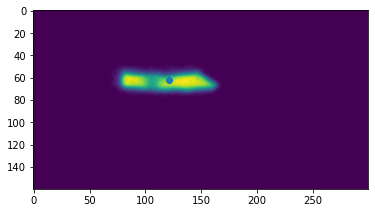

23


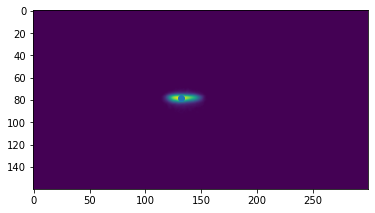

22


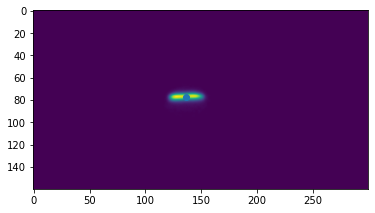

21


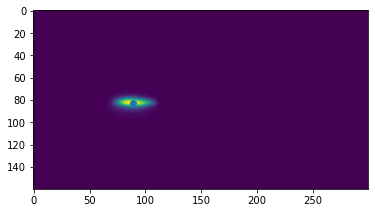

21


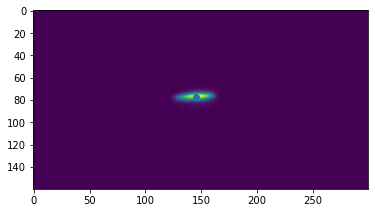

22


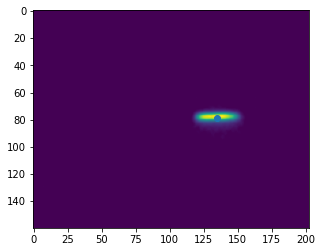

22


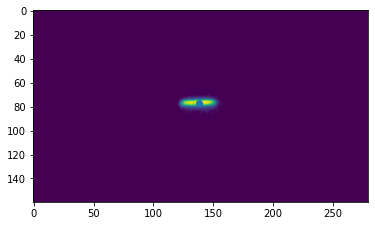

21


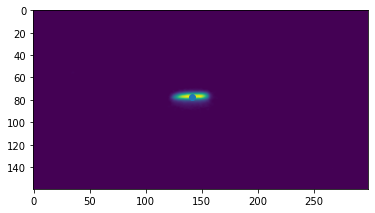

21


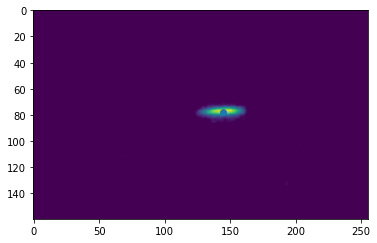

21


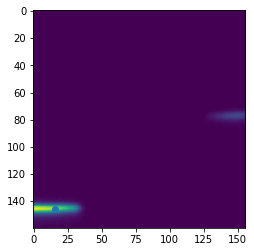

23


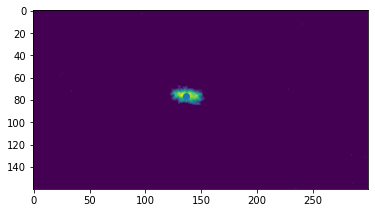

23


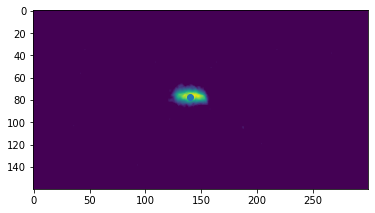

22


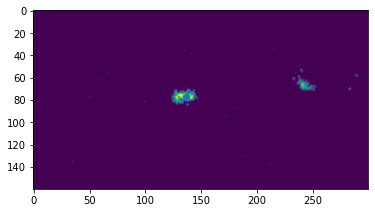

28


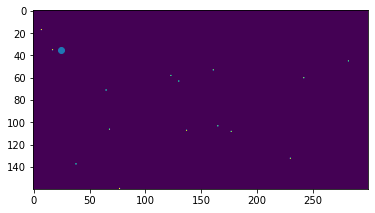

23


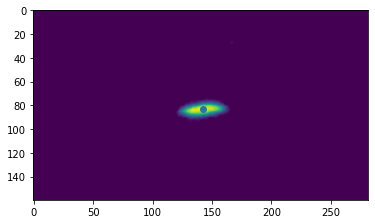

23


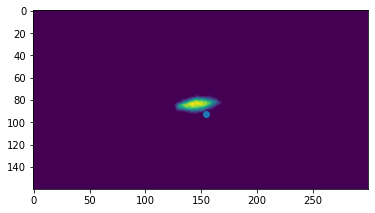

23


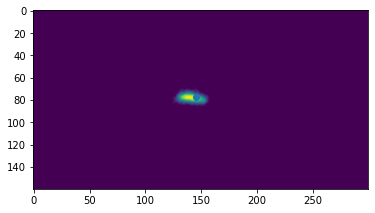

22


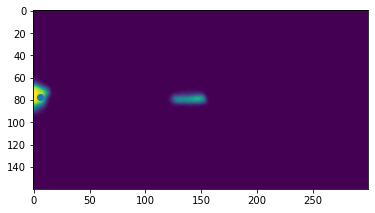

21


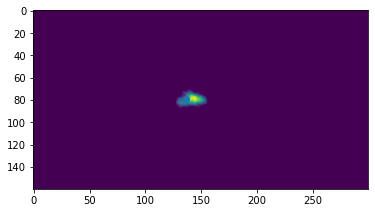

21


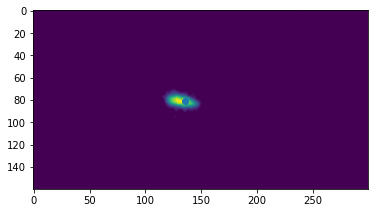

16


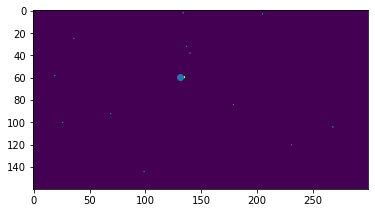

24


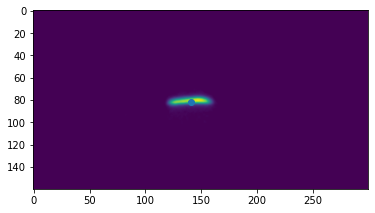

20


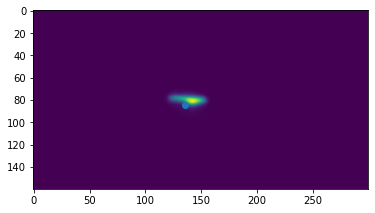

29


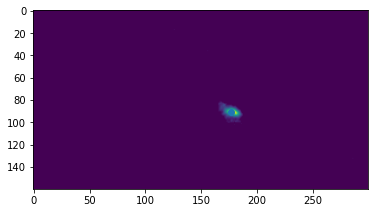

23


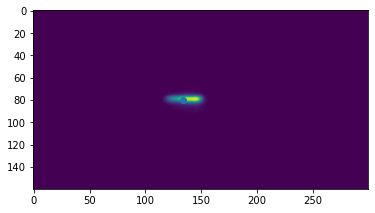

23


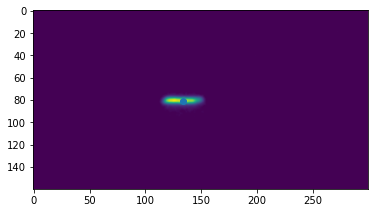

24


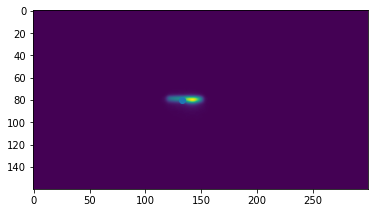

23


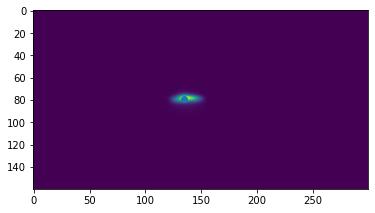

19


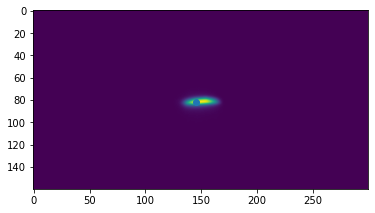

20


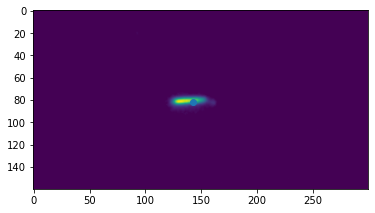

21


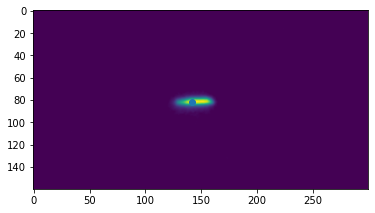

18


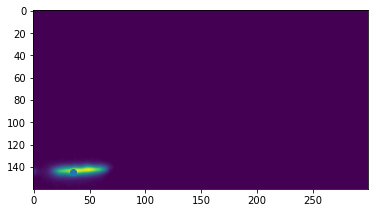

21


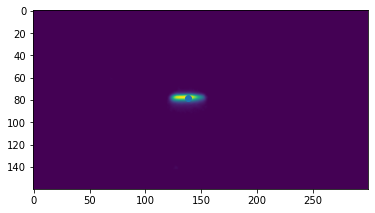

22


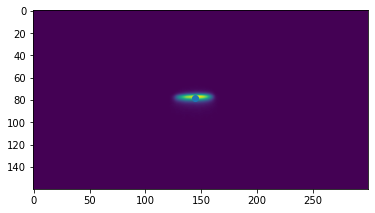

21


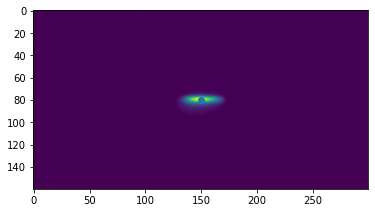

16


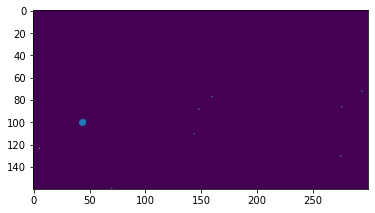

23


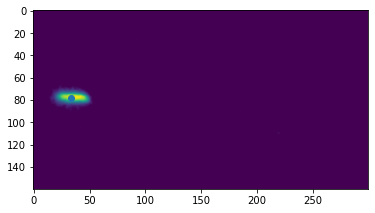

21


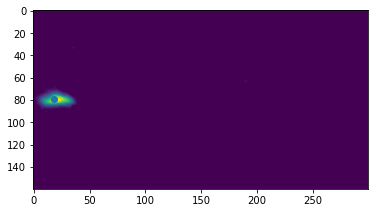

23


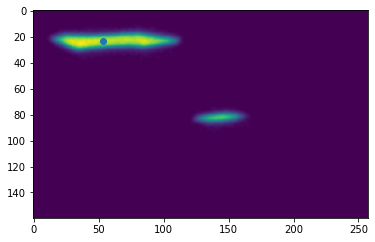

22


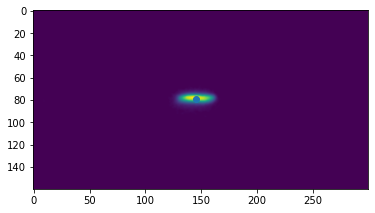

22


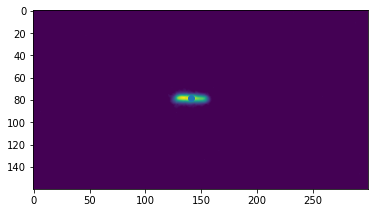

22


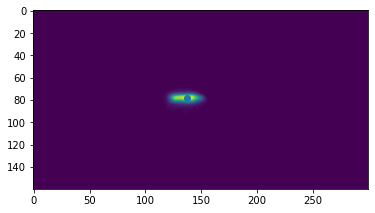

22


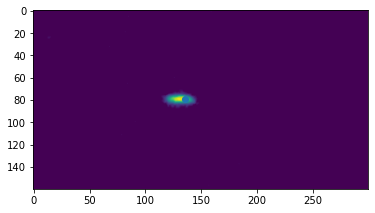

22


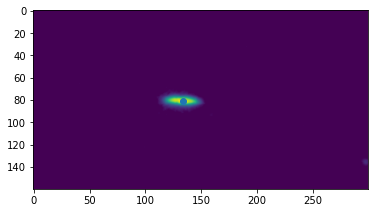

22


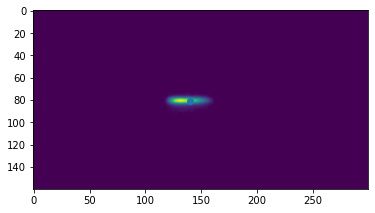

22


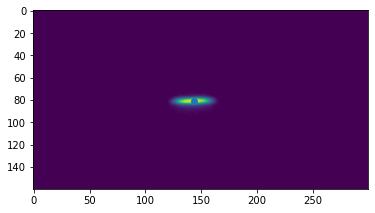

23


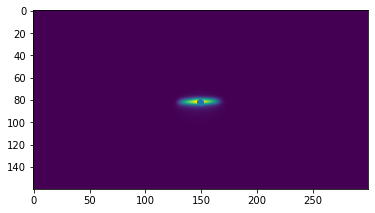

22


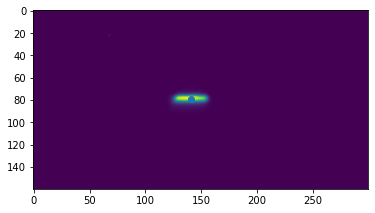

22


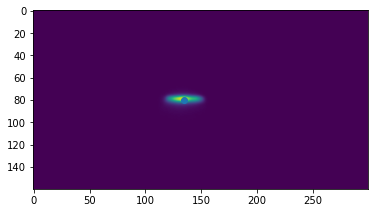

21


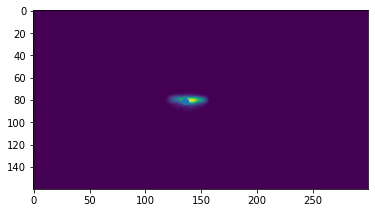

21


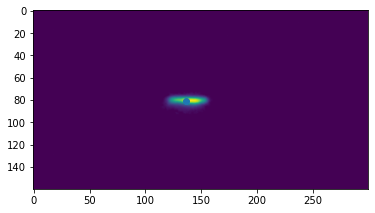

20


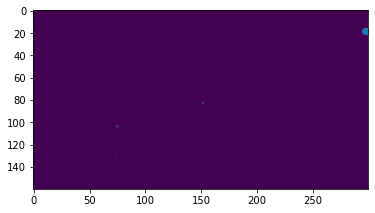

22


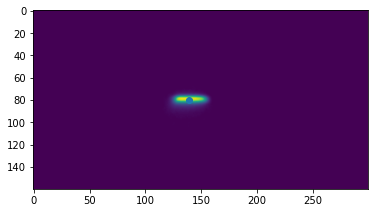

22


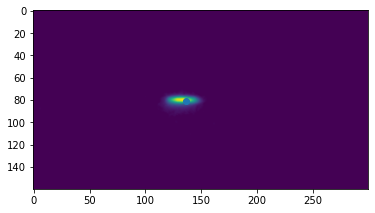

In [4]:
path = 'Calibration_Files/'
centers_of_mass = data_prep(Cfg,grain,path)

## Run calibration

In [12]:
######################################################################################
cutoff = [30,10] # choose pixel distances above which peaks will be excluded from the calibration 
###########################################################################################


x,oldPs,newPs,absCOM,goodidx = optimize_detector(centers_of_mass,Cfg,grain,cutoff)
dist0 = np.absolute(np.linalg.norm(oldPs-absCOM,axis=1)).mean()
dist1 = np.absolute(np.linalg.norm(newPs-absCOM,axis=1)).mean()
print('average pixel distance between simulated and experimental peaks before optimization:',dist0)
print('average pixel distance between simulated and experimental peaks after optimization:',dist1)
print('number of peaks used:',len(oldPs))

24.557633680503727
-0.013995894935821625
-3.1699914483433003
average pixel distance between simulated and experimental peaks before optimization: 4.330837272417509
average pixel distance between simulated and experimental peaks after optimization: 1.020948591001466
number of peaks used: 86


## Check the position of simulated Bragg peaks after calibration

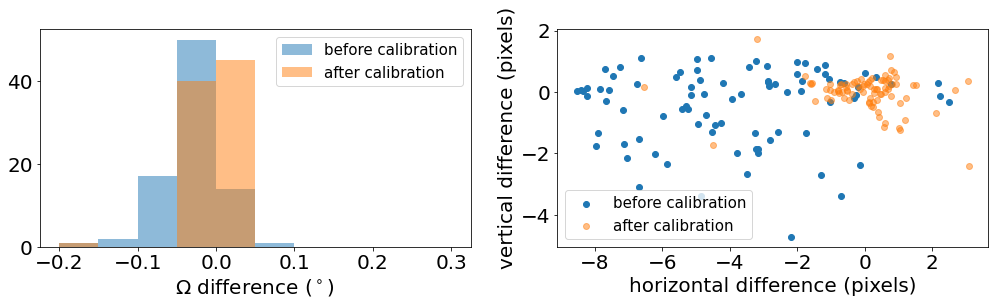

In [16]:
fig,ax=plt.subplots(1,2,figsize=(17,4))
ax[0].hist(oldPs[:,2]-absCOM[:,2],label='before calibration',bins=np.arange(-0.2,0.35,0.05),alpha=0.5)
ax[0].hist(newPs[:,2]-absCOM[:,2],label='after calibration',bins=np.arange(-0.2,0.35,0.05),alpha=0.5)
ax[0].legend( fontsize=15)
ax[0].set_xlabel(r'$\Omega$ difference $(^\circ)$', fontsize=20)
ax[1].scatter(oldPs[:,0]-absCOM[:,0],oldPs[:,1]-absCOM[:,1],label='before calibration')
ax[1].scatter(newPs[:,0]-absCOM[:,0],newPs[:,1]-absCOM[:,1],label='after calibration',alpha=0.5)
ax[1].set_xlabel('horizontal difference (pixels)', fontsize=20)
ax[1].set_ylabel('vertical difference (pixels)', fontsize=20)
ax[1].legend( fontsize=15)
ax[0].tick_params(axis='both', which='major', labelsize=20)
ax[1].tick_params(axis='both', which='major', labelsize=20)
plt.show()

## Write new parameters to config file

In [17]:
write_config_file(x)